# K-MEANS MODEL (Unsupervised & Supervised)

## OBJECTIVE:
## Classify houses according to the region in which they are located and the average income

### 0. Data ingestion

In [32]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import os
import joblib
import pickle

In [2]:
df_houses = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

### 1. Data set general information

In [3]:
df_houses

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_houses.duplicated().sum()

np.int64(0)

In [6]:
missing_values = df_houses.isnull().sum()

<Axes: >

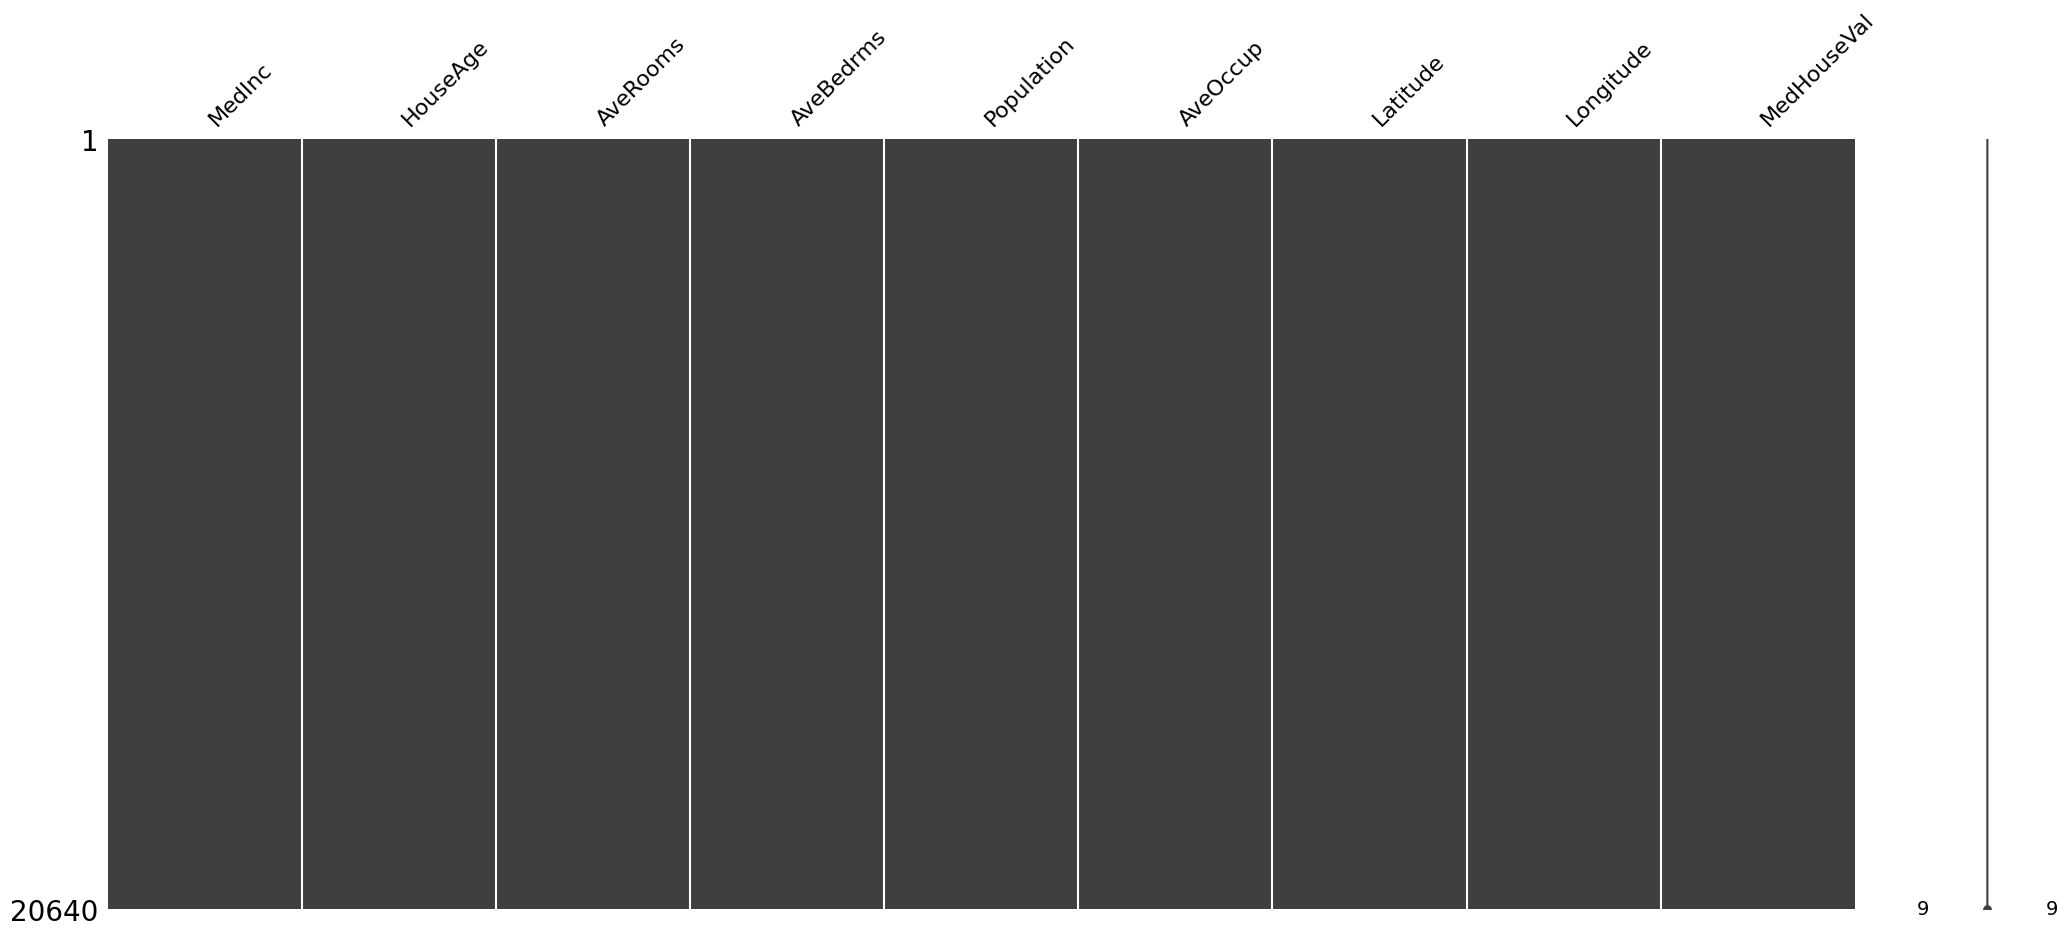

In [7]:
msno.matrix(df_houses)

### 2. Data division

In [8]:
X = df_houses.drop("MedHouseVal", axis = 1)
y = df_houses["MedHouseVal"]

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_anon, y_test, y_anon = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

### 3. Scaling data

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [11]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. K-MEANS model

In [12]:
X_scaled = scaler.transform(X)

#### 4.0. Iterating over different k values:

In [13]:
k_values = range(2, 20)
silhouette_scores = []
for k in k_values:
    cluster_labels = KMeans(n_clusters = k, random_state = 42).fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled,cluster_labels))

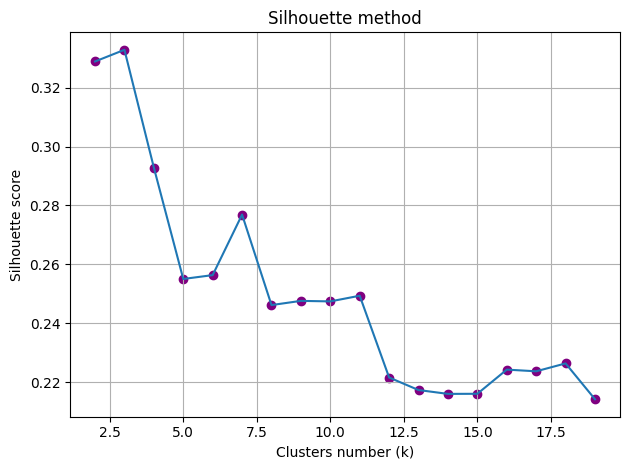

In [14]:
plt.plot(k_values, silhouette_scores)
plt.scatter(k_values, silhouette_scores, color = "purple", label = "Dots")
plt.title("Silhouette method")
plt.xlabel("Clusters number (k)")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.grid(True)
plt.show()

#### 4.1. K-means (6 clusters)

In [15]:
k_means = KMeans(n_clusters = 6, random_state = 42)
cluster_labels = k_means.fit_predict(X_scaled)

<span style =  "color:orange">To reduce in 2D

In [16]:
pca = PCA(n_components = 2)
X_scaled_pca = pca.fit_transform(X_scaled)

### 5. Stores the cluster to which each house belongs

In [17]:
df_houses["cluster"] = pd.Series(cluster_labels, dtype = "category")

In [18]:
df_houses

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,3
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1


### 6. Graphic description

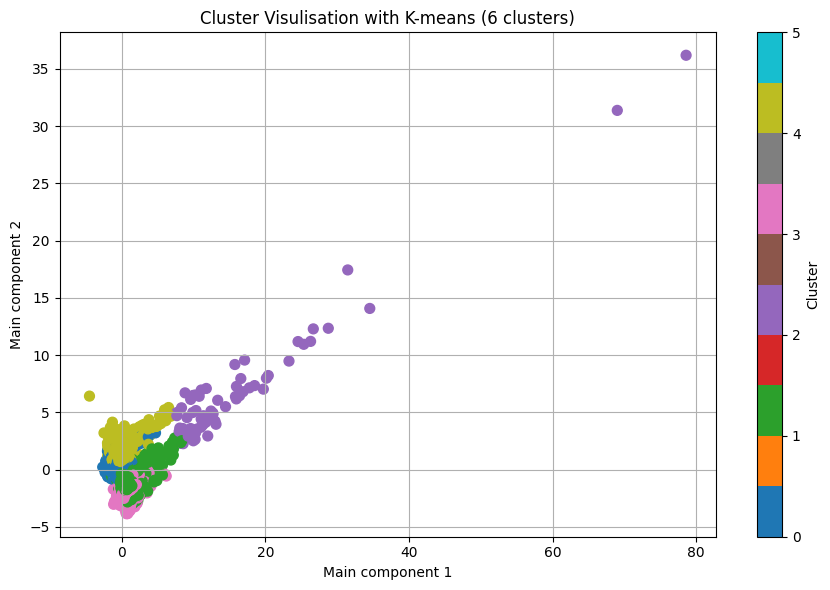

In [19]:
plt.figure(figsize = (9, 6))
scatter = plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c = cluster_labels, cmap = "tab10", s = 50)
plt.title("Cluster Visulisation with K-means (6 clusters)")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.colorbar(scatter, label = "Cluster")
plt.tight_layout()
plt.grid(True)
plt.show()

This graph represents data segmentation using the K-means algorithm, configured to identify six clusters. Each point corresponds to an observation (houses), and the colours indicate the group to which it belongs based on this characteristics. To facilitate visualisation, the data was reduced to two principal components using PCA (Principal Componente Analysis), wich allows us to observe how th data is grouped in space.

### 7. Predict with test set

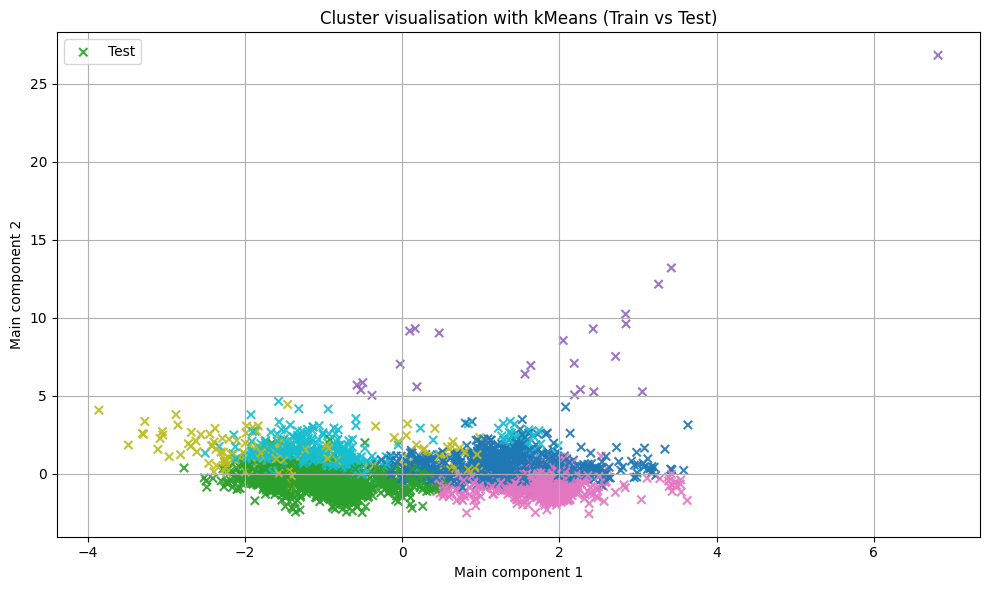

In [20]:
test_labels = k_means.fit_predict(X_test_scaled)
pca = PCA(n_components = 2)
X_test_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize = (10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = test_labels, cmap = "tab10", label = "Test", alpha = 0.9, marker = "x")
plt.title("Cluster visualisation with kMeans (Train vs Test)")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 8. Data set training

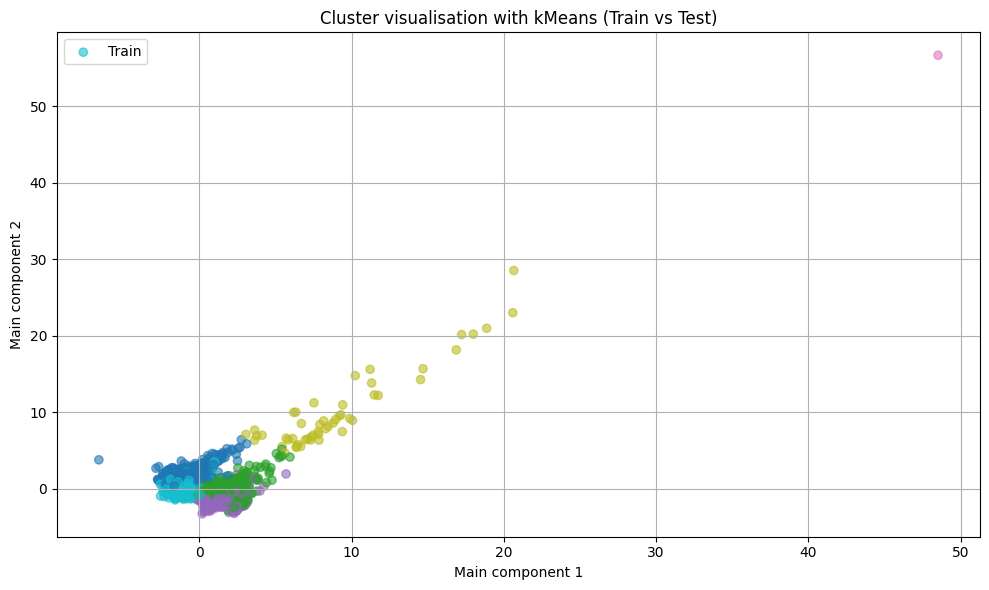

In [21]:
train_labels = k_means.fit_predict(X_train_scaled)
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize = (10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = train_labels, cmap = "tab10", label = "Train", alpha = 0.6, marker = "o")
plt.title("Cluster visualisation with kMeans (Train vs Test)")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. Supervised KMedias model training

In [22]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train_scaled, train_labels)
predicted_labels = clf.predict(X_test_scaled)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average = "weighted", zero_division = 0)
recall = recall_score(test_labels, predicted_labels, average = "weighted", zero_division = 0)
conf_matrix = confusion_matrix(test_labels, predicted_labels)
report = classification_report(test_labels, predicted_labels, zero_division = 0)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nReport:\n", report)

Accuracy: 0.017926356589147287
Precision: 0.005990771556423126
Recall: 0.017926356589147284

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       903
           1       0.00      0.00      0.00      1762
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00       722
           4       0.00      0.00      0.00       198
           5       0.04      0.14      0.07       519

    accuracy                           0.02      4128
   macro avg       0.01      0.02      0.01      4128
weighted avg       0.01      0.02      0.01      4128



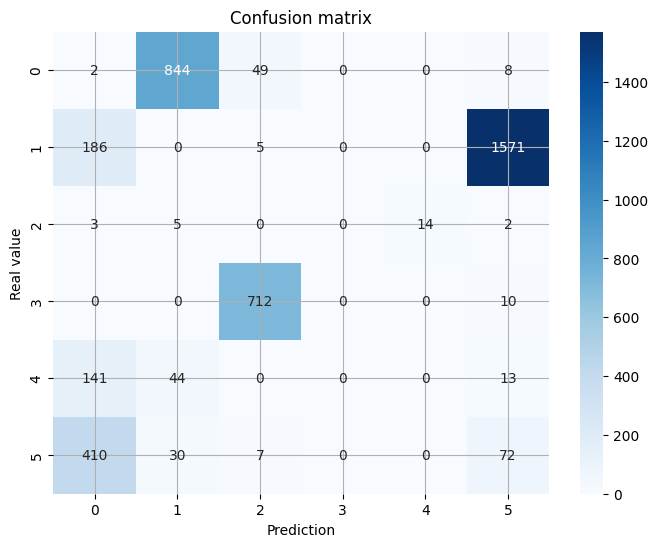

In [23]:
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("Real value")
plt.tight_layout
plt.grid(True)
plt.show()

### 10. CONCLUSIONS

- Confusion matrix evaluates the performance of a supervised classification model based on clusters generated by KMeans.
- Axes show the actual classes (Y axis) an the predicted classes (X axis), with values from 0 to 5, corresponding to the 6 clusters.
- Diagonal cells (such as class 0 with 844 instances) indicate correct predictions, while the cells outside the diagonal represent classification errors.
- The blue colour gradient allow us to visually identify where the model is most accurate (dark blue) and where it fails (light blue).
- Visualisation is useful for detecting imbalances between clusters and assessing whether the supervised model correctly generalises the segmentation performed by KMeans.

## SAVING THE MODEL

In [36]:
os.makedirs("models", exist_ok = True)
joblib.dump("kmeans_model","models/kmeans_model.pkl")
with open("models/kmeans_model.pkl", "wb") as f:
    pickle.dump(k_means, f)